In [1]:
### pricing project 1, question 3
import pandas as pd
import numpy as np
import datetime as dt
#from scipy import linalg
import matplotlib.pyplot as plt
from tqdm import tqdm  #### loop 
from sklearn.neighbors import KernelDensity
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from PIL import Image  
import PIL 

In [2]:
def boundary_func(T=1, S0=10, K=10, mu=0.05, sigma=0.2, r=0.02, N=5000):
    dt = T/N
    q = (1-np.exp(-sigma*np.sqrt(dt)))/(np.exp(sigma*np.sqrt(dt))-np.exp(-sigma*np.sqrt(dt)))
    u = np.exp(r*dt + sigma*np.sqrt(dt))
    d = np.exp(r*dt - sigma*np.sqrt(dt))
    
    S_table = np.zeros((N+1,N+1))
    P_table = np.zeros((N+1,N+1))
    S_table[0,0] = S0
    for k in tqdm(range(1,N+1)):
        S_table[:,k] = S_table[:,k-1]*u
        S_table[k,k] = S_table[k-1,k-1]*d
    P_table[:,N] = np.maximum(K-S_table[:,N],0)
    
    i_table = np.zeros((N+1,N+1))
    for k in tqdm(range(1,N+1)):
        P_table[:N-k+1,N-k] =  (P_table[:N-k+1,N-k+1]*q + P_table[1:N-k+2,N-k+1]*(1-q))/np.exp(r*dt)
        i_table[:N-k+1,N-k] = np.where(np.maximum(K - S_table[:N-k+1,N-k],0) > P_table[:N-k+1,N-k],1,0)
        P_table[:N-k+1,N-k] = np.maximum(np.maximum(K - S_table[:N-k+1,N-k],0),P_table[:N-k+1,N-k])
    P_table1 = np.multiply(i_table,S_table)
    P_boundary = np.max(P_table1,axis=0)
    boundary_df = pd.DataFrame(index=np.array(range(N+1))/N,columns=['boundary'])
    boundary_df['boundary'] = P_boundary
    boundary_df.loc[1.0,'boundary'] = K
    put_price = P_table[0,0]
    return put_price,boundary_df

In [3]:
def SimPrice(put_price,boundary_df,T=1, S0=10, K=10, mu=0.05, sigma=0.2, r=0.02, N=5000, Nsims=10000):
    pnl = np.zeros(Nsims)
    tlist = np.zeros(Nsims)
    t = np.linspace(0,T,N+1)
    dt = t[1] - t[0]
    p = 0.5*(1 + ((mu-r) - 0.5*sigma*sigma)*np.sqrt(dt)/sigma)
    
    S = np.zeros((Nsims,len(t)))
    S[:,0] = S0
    for i in tqdm(range(len(t)-1)):
        U = np.random.rand(Nsims)
        up = (U < p)
        x = 2*up - 1
        S[:,i+1] = S[:,i]*np.exp(r*dt + sigma*np.sqrt(dt)*x)
        
    idd = 0
    for i in range(Nsims):
        e_idx = np.where(S[i,:] <= np.array(boundary_df.boundary),1,0)
        if (e_idx==0).all():
            idd += 1
            pnl[i] = -put_price
            tlist[i] = -1
        else:
            e_idxdf = pd.Series(e_idx,index=range(N+1))
            e_idx1 = e_idxdf[e_idxdf>0].index[0]
            tlist[i] = e_idx1*dt
            pnl[i] = (K - S[i,e_idx1])/np.exp(r*tlist[i]) - put_price
    
    print(idd)         
    return pnl,tlist

In [4]:
##calculation for put price and boundary
put_price1,boundary_df1 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.2, r=0.02, N=5000)
put_price2,boundary_df2 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.1, r=0.02, N=5000)
put_price3,boundary_df3 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.2, r=0.04, N=5000)
put_price4,boundary_df4 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.1, r=0.04, N=5000)


pnl,tlist = SimPrice(put_price=put_price1, boundary_df=boundary_df1, T=1, S0=10, K=10, mu=0.05, sigma=0.2, r=0.02, N=5000, Nsims=10000)

100%|██████████| 5000/5000 [00:02<00:00, 1725.95it/s]


5397


In [ ]:
put_price5,boundary_df5 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.2, r=0.12, N=5000)
put_price6,boundary_df6 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.1, r=0.12, N=5000)
put_price7,boundary_df7 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.3, r=0.02, N=5000)
put_price8,boundary_df8 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.3, r=0.04, N=5000)
put_price9,boundary_df9 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.3, r=0.12, N=5000)

In [ ]:
#Q3-a 
##### boundary curve （sensitivity analysis plot are listed at the end of this document）
plt.figure(figsize=(12,8),dpi=300)
plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()


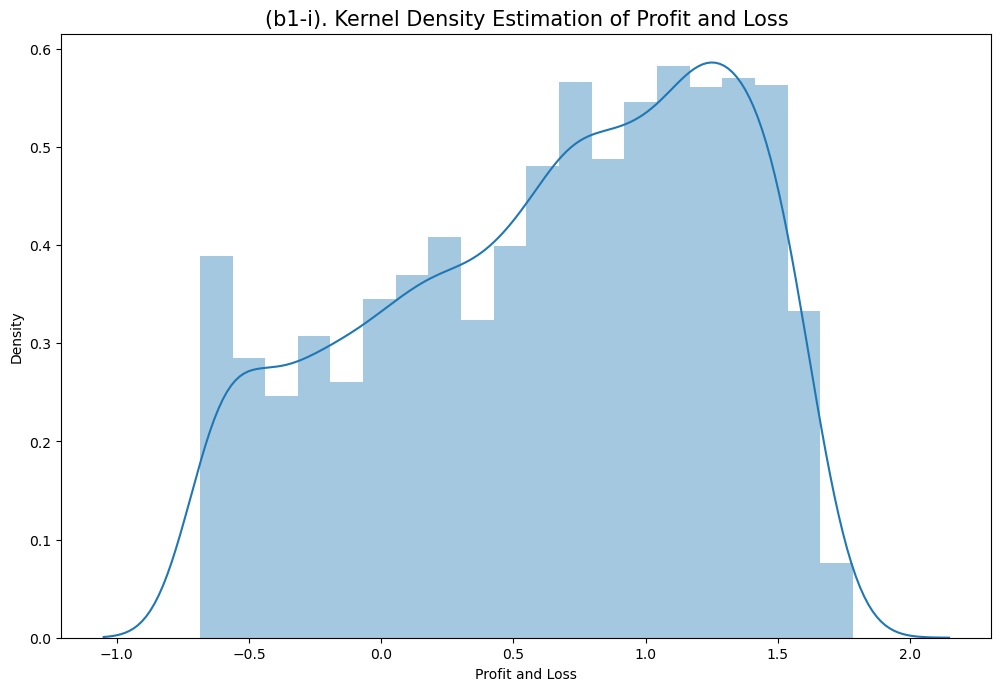

-0.09314368596424341


In [5]:
# q3-b1-(i)
### kernel density estimation of pnl
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(pnl[pnl>-put_price1])
##sns.distplot(pnl)
plt.title('(b1-i). Kernel Density Estimation of Profit and Loss',fontsize=15)
plt.xlabel("Profit and Loss")
plt.show()

print(pnl.mean()) 

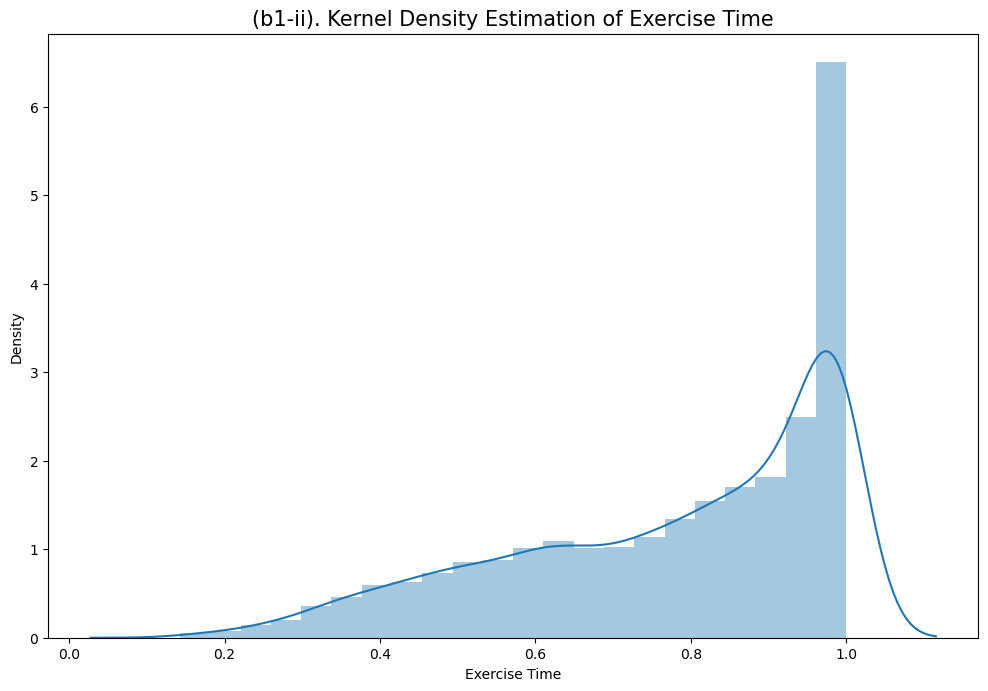

0.7768266348033891


In [6]:
# q3-b1-(ii)
### kernel density estimation of exercise time
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(tlist[tlist>0])
plt.title('(b1-ii). Kernel Density Estimation of Exercise Time',fontsize=15)
plt.xlabel("Exercise Time")
plt.show()

print(tlist[tlist>0].mean())

In [7]:
# q3-b2
### simulation under different realized volatility
pnl2,tlist2 = SimPrice(put_price=put_price1, boundary_df=boundary_df1, T=1, S0=10, K=10, mu=0.05, sigma=0.10, r=0.02, N=5000, Nsims=10000)
pnl3,tlist3 = SimPrice(put_price=put_price1, boundary_df=boundary_df1, T=1, S0=10, K=10, mu=0.05, sigma=0.15, r=0.02, N=5000, Nsims=10000)
pnl4,tlist4 = SimPrice(put_price=put_price1, boundary_df=boundary_df1, T=1, S0=10, K=10, mu=0.05, sigma=0.20, r=0.02, N=5000, Nsims=10000)
pnl5,tlist5 = SimPrice(put_price=put_price1, boundary_df=boundary_df1, T=1, S0=10, K=10, mu=0.05, sigma=0.25, r=0.02, N=5000, Nsims=10000)
pnl6,tlist6 = SimPrice(put_price=put_price1, boundary_df=boundary_df1, T=1, S0=10, K=10, mu=0.05, sigma=0.30, r=0.02, N=5000, Nsims=10000)


  3%|▎         | 156/5000 [00:00<00:03, 1555.69it/s]

6775


  3%|▎         | 154/5000 [00:00<00:03, 1533.19it/s]

5986


  3%|▎         | 167/5000 [00:00<00:02, 1666.68it/s]

5568


  3%|▎         | 149/5000 [00:00<00:03, 1487.82it/s]

4934


100%|██████████| 5000/5000 [00:02<00:00, 1758.58it/s]


4462


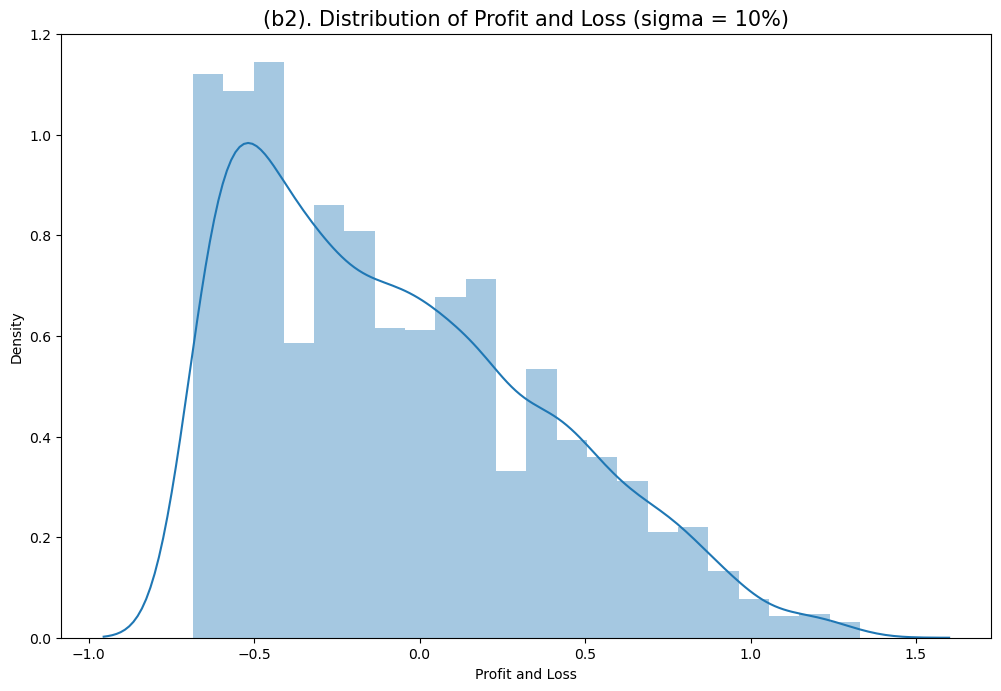

-0.5041928074023675


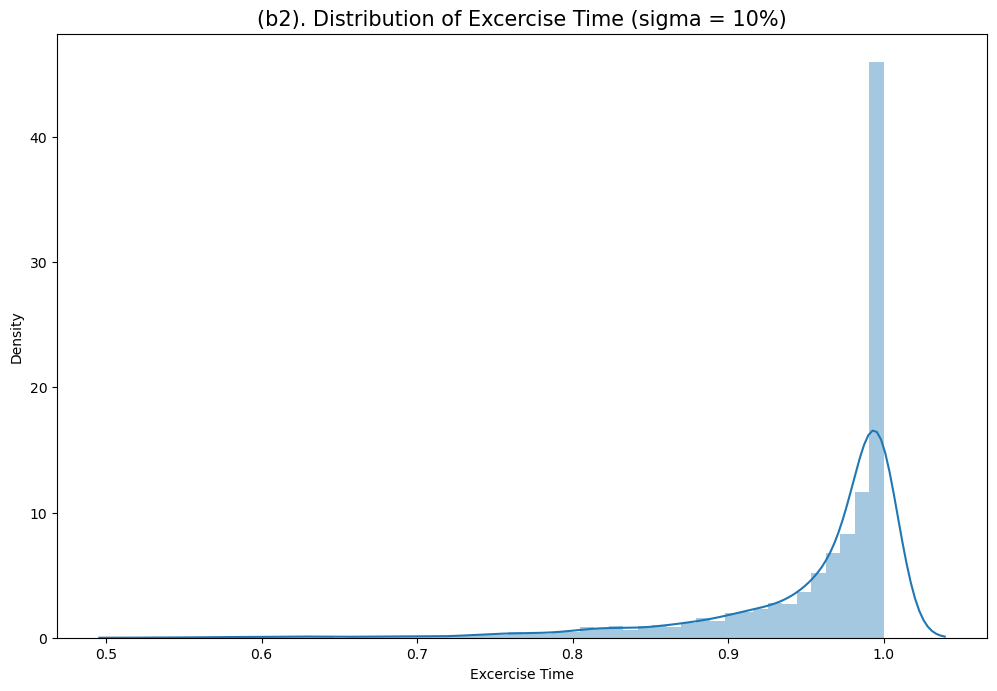

0.9570664186046512


In [8]:
#simga = 10%
# q3-b2- distribution of PnL
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(pnl2[pnl2>-put_price1])
plt.title('(b2). Distribution of Profit and Loss (sigma = 10%)',fontsize=15)
plt.xlabel("Profit and Loss")
plt.show()

print(pnl2.mean())

# q3-b2- distribution of excercise time
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(tlist2[tlist2>0])
plt.title('(b2). Distribution of Excercise Time (sigma = 10%)',fontsize=15)
plt.xlabel("Excercise Time")
plt.show()

print(tlist2[tlist2>0].mean())

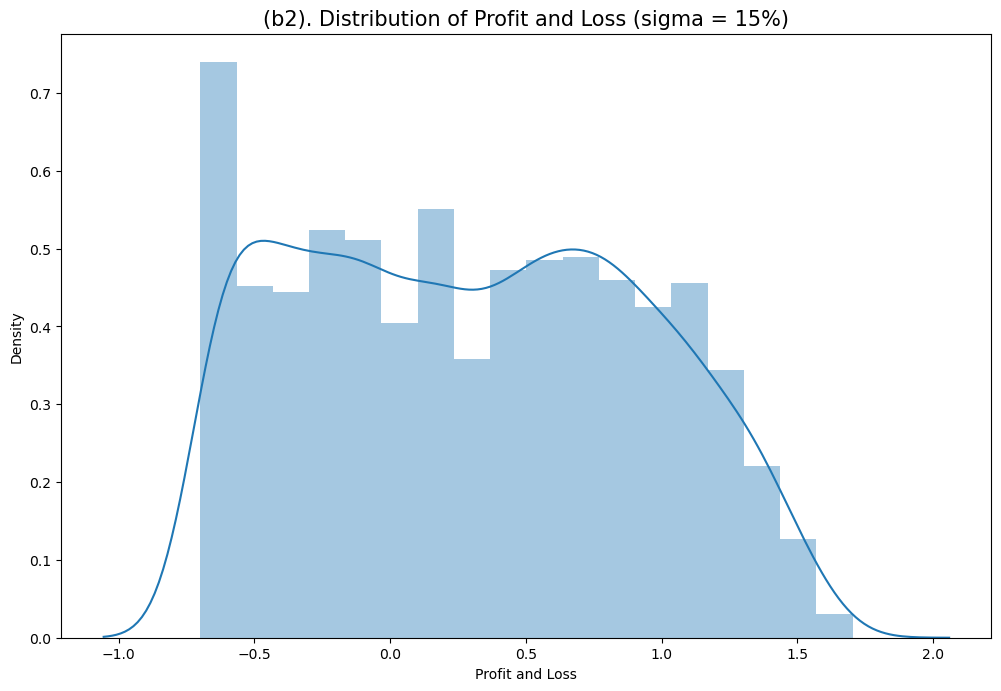

-0.3035721440996345


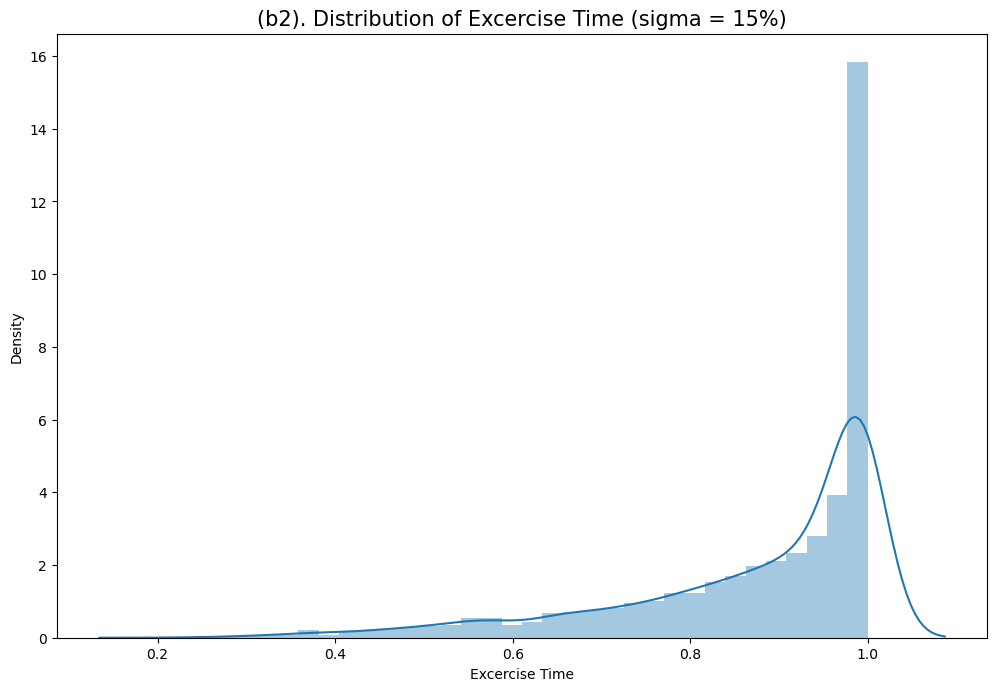

0.8744176880916793


In [9]:
#simga = 15%
# q3-b2- distribution of PnL
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(pnl3[pnl3>-put_price1])
plt.title('(b2). Distribution of Profit and Loss (sigma = 15%)',fontsize=15)
plt.xlabel("Profit and Loss")
plt.show()

print(pnl3.mean())

# q3-b2- distribution of excercise time
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(tlist3[tlist3>0])
plt.title('(b2). Distribution of Excercise Time (sigma = 15%)',fontsize=15)
plt.xlabel("Excercise Time")
plt.show()

print(tlist3[tlist3>0].mean())

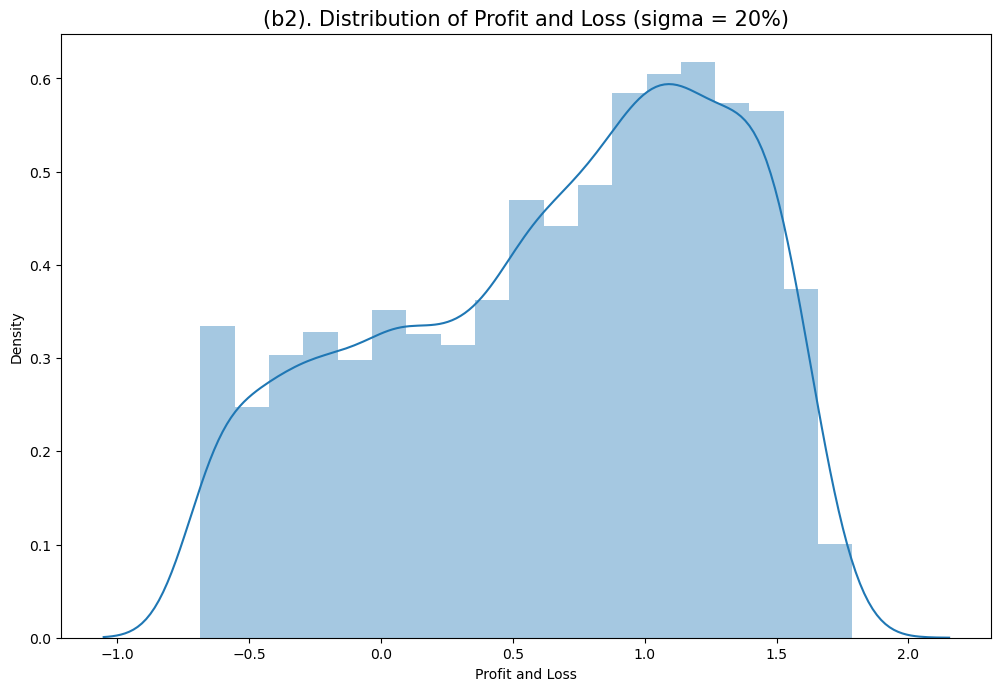

-0.10675787468860949


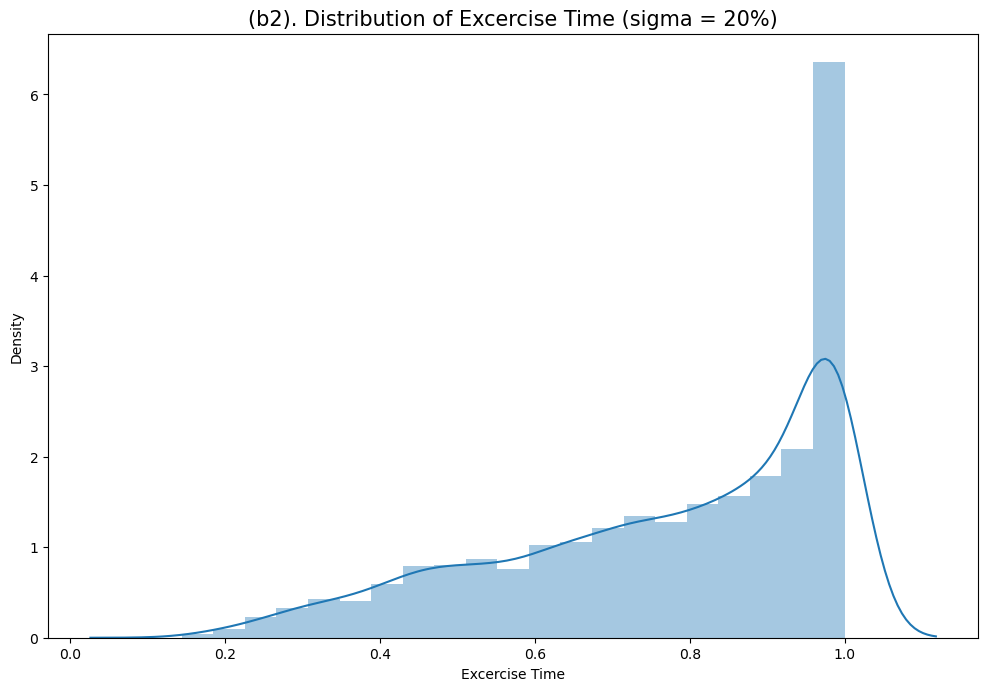

0.7693037906137185


In [10]:
#simga = 20%
# q3-b2- distribution of PnL
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(pnl4[pnl4>-put_price1])
plt.title('(b2). Distribution of Profit and Loss (sigma = 20%)',fontsize=15)
plt.xlabel("Profit and Loss")
plt.show()

print(pnl4.mean())

# q3-b2- distribution of excercise time
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(tlist4[tlist4>0])
plt.title('(b2). Distribution of Excercise Time (sigma = 20%)',fontsize=15)
plt.xlabel("Excercise Time")
plt.show()

print(tlist4[tlist4>0].mean())

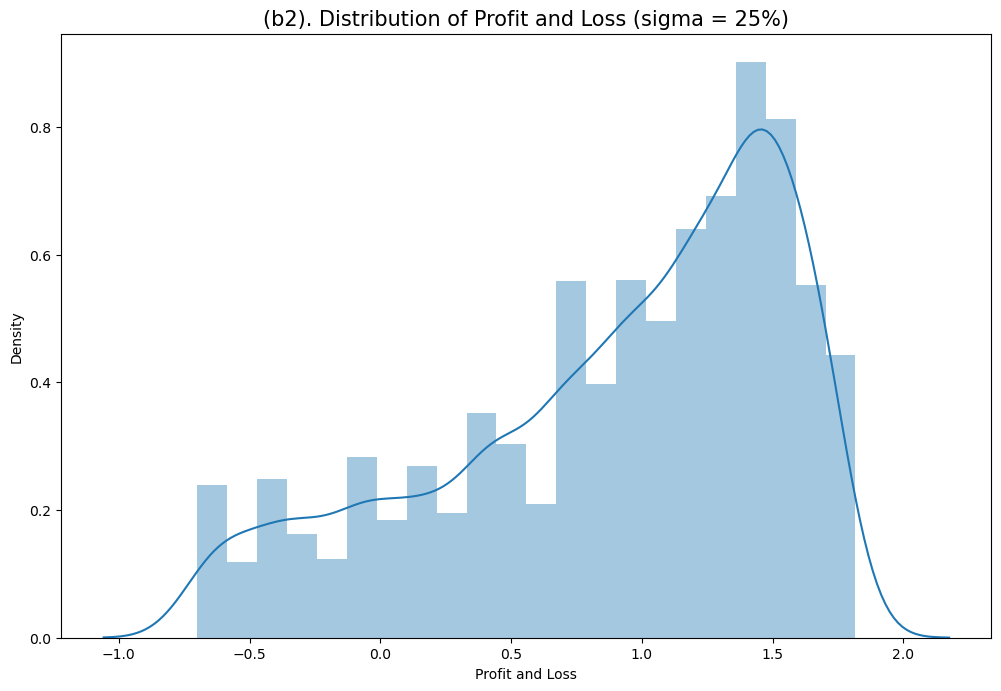

0.10006217150084627


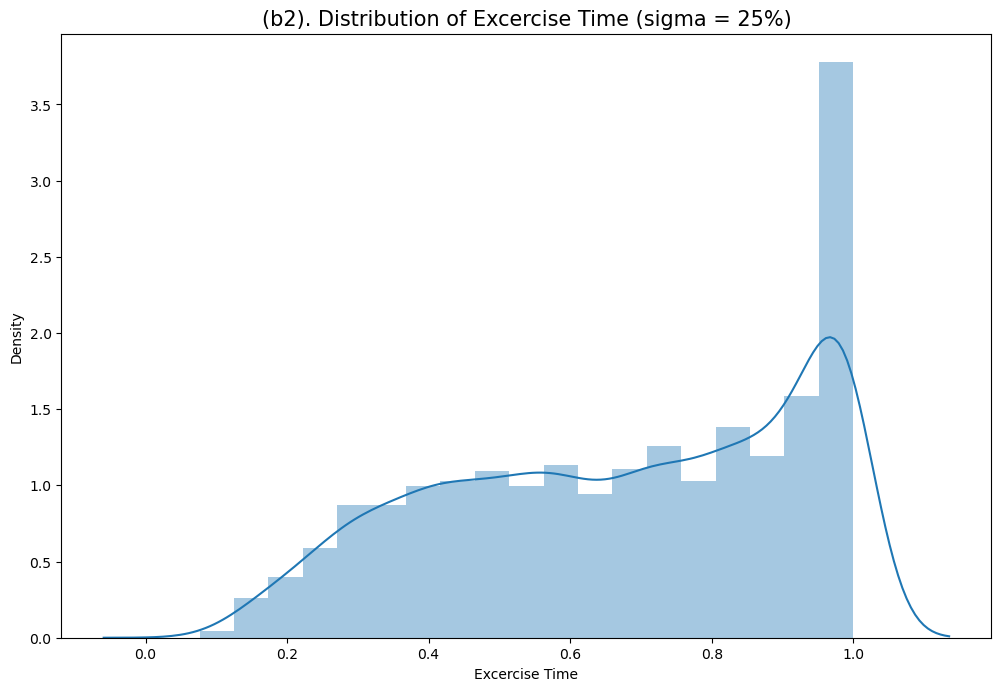

0.6751728385313858


In [11]:
#simga = 25%
# q3-b2- distribution of PnL
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(pnl5[pnl5>-put_price1])
plt.title('(b2). Distribution of Profit and Loss (sigma = 25%)',fontsize=15)
plt.xlabel("Profit and Loss")
plt.show()

print(pnl5.mean())

# q3-b2- distribution of excercise time
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(tlist5[tlist5>0])
plt.title('(b2). Distribution of Excercise Time (sigma = 25%)',fontsize=15)
plt.xlabel("Excercise Time")
plt.show()

print(tlist5[tlist5>0].mean())

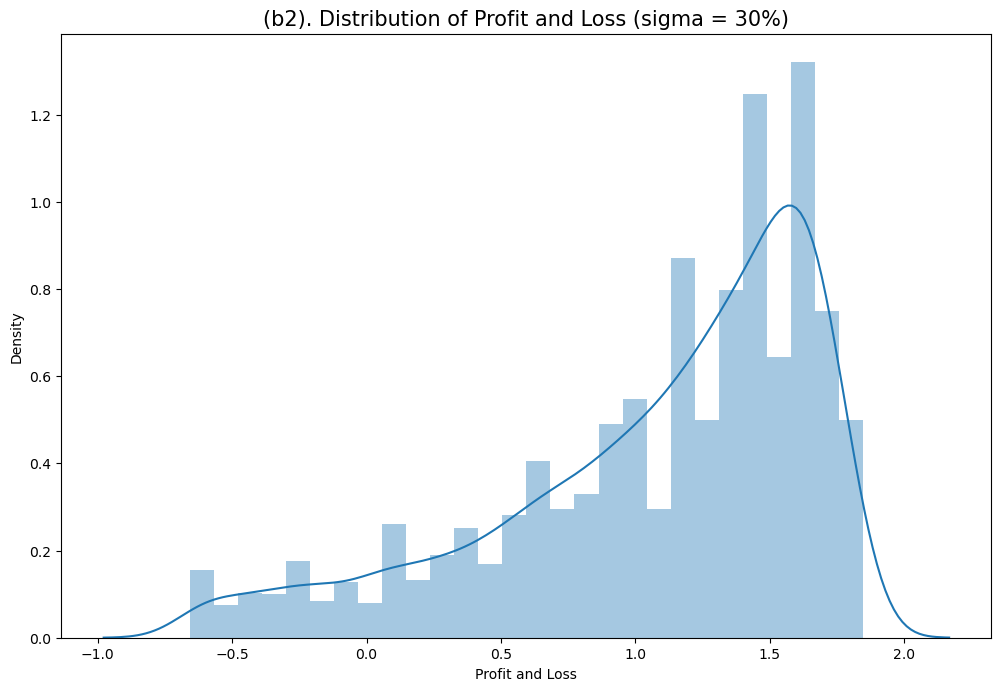

0.2805970682407201


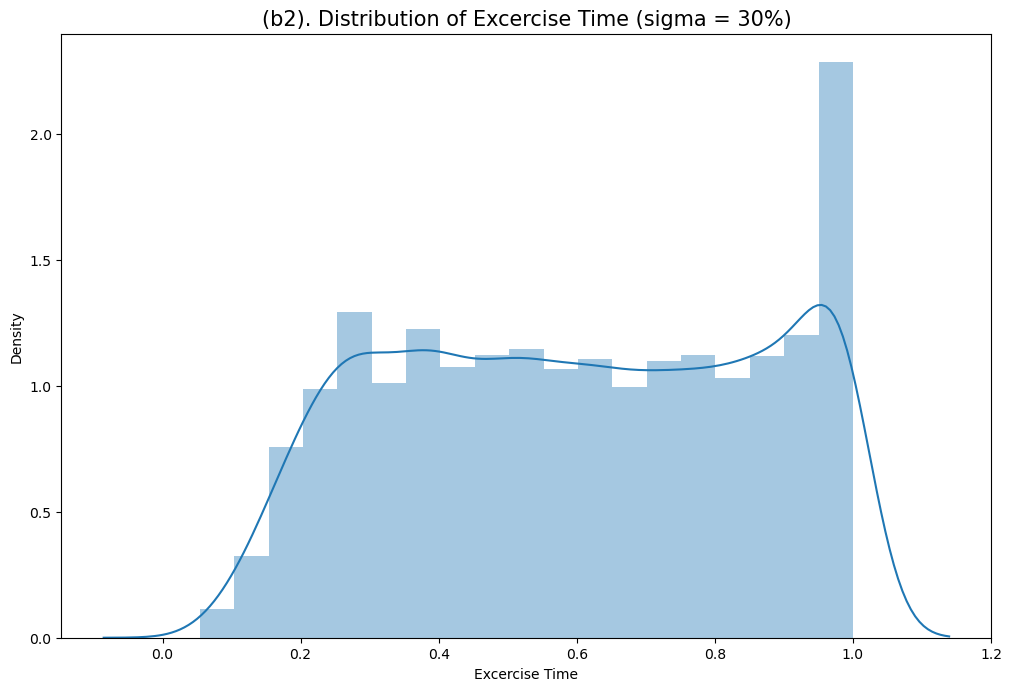

0.5978065366558325


In [12]:
#simga = 30%
# q3-b2- distribution of PnL
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(pnl6[pnl6>-put_price1])
plt.title('(b2). Distribution of Profit and Loss (sigma = 30%)',fontsize=15)
plt.xlabel("Profit and Loss")
plt.show()

print(pnl6.mean())

# q3-b2- distribution of excercise time
plt.figure(figsize=(12,8),dpi=100)
sns.distplot(tlist6[tlist6>0])
plt.title('(b2). Distribution of Excercise Time (sigma = 30%)',fontsize=15)
plt.xlabel("Excercise Time")
plt.show()

print(tlist6[tlist6>0].mean())

In [19]:
#
put_price1,boundary_df1 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.2, r=0.02, N=5000)
put_price2,boundary_df2 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.1, r=0.02, N=5000)
put_price3,boundary_df3 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.2, r=0.04, N=5000)
put_price4,boundary_df4 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.1, r=0.04, N=5000)

put_price5,boundary_df5 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.2, r=0.12, N=5000)
put_price6,boundary_df6 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.1, r=0.12, N=5000)

100%|██████████| 5000/5000 [00:01<00:00, 3001.82it/s]


In [20]:
put_price7,boundary_df7 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.3, r=0.02, N=5000)
put_price8,boundary_df8 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.3, r=0.04, N=5000)
put_price9,boundary_df9 = boundary_func(T=1, S0=10, K=10,mu=0.05, sigma=0.3, r=0.12, N=5000)

100%|██████████| 5000/5000 [00:01<00:00, 3194.09it/s]


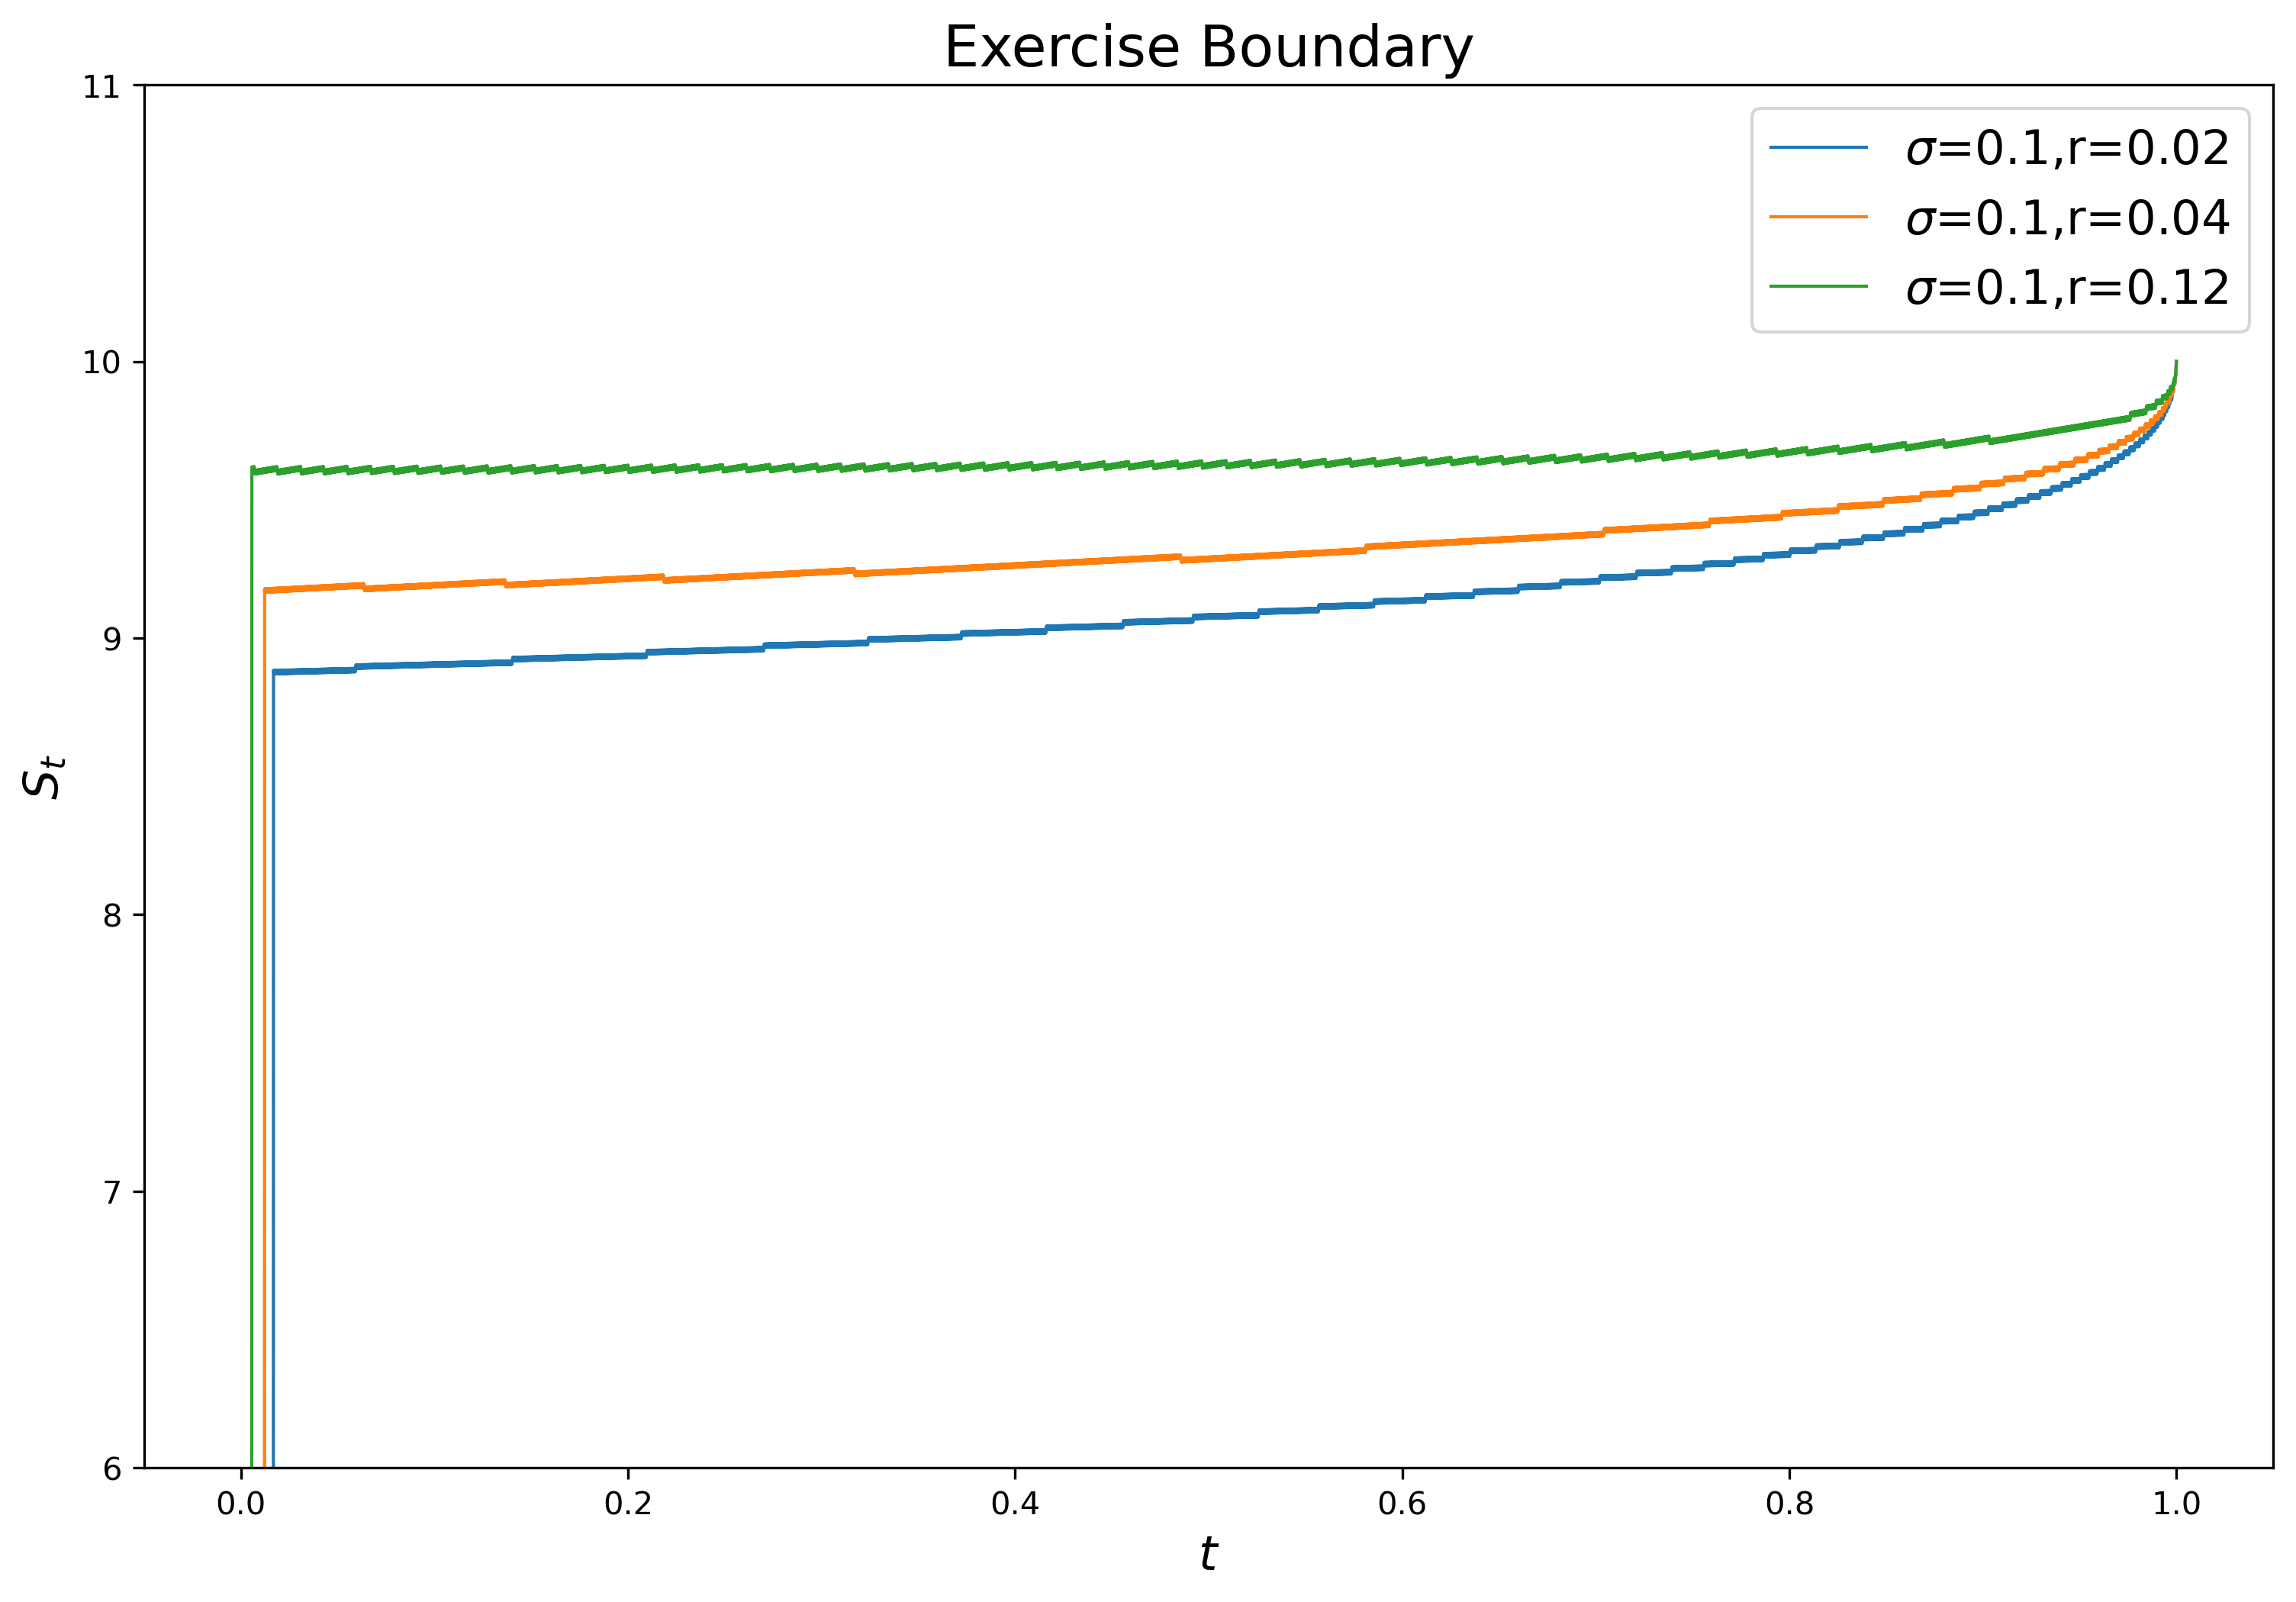

In [22]:
#Q3-a sensitivity analysis
##### boundary curve
plt.figure(figsize=(12,8),dpi=300)
#plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
#plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
#plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
#plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
#plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
#plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()


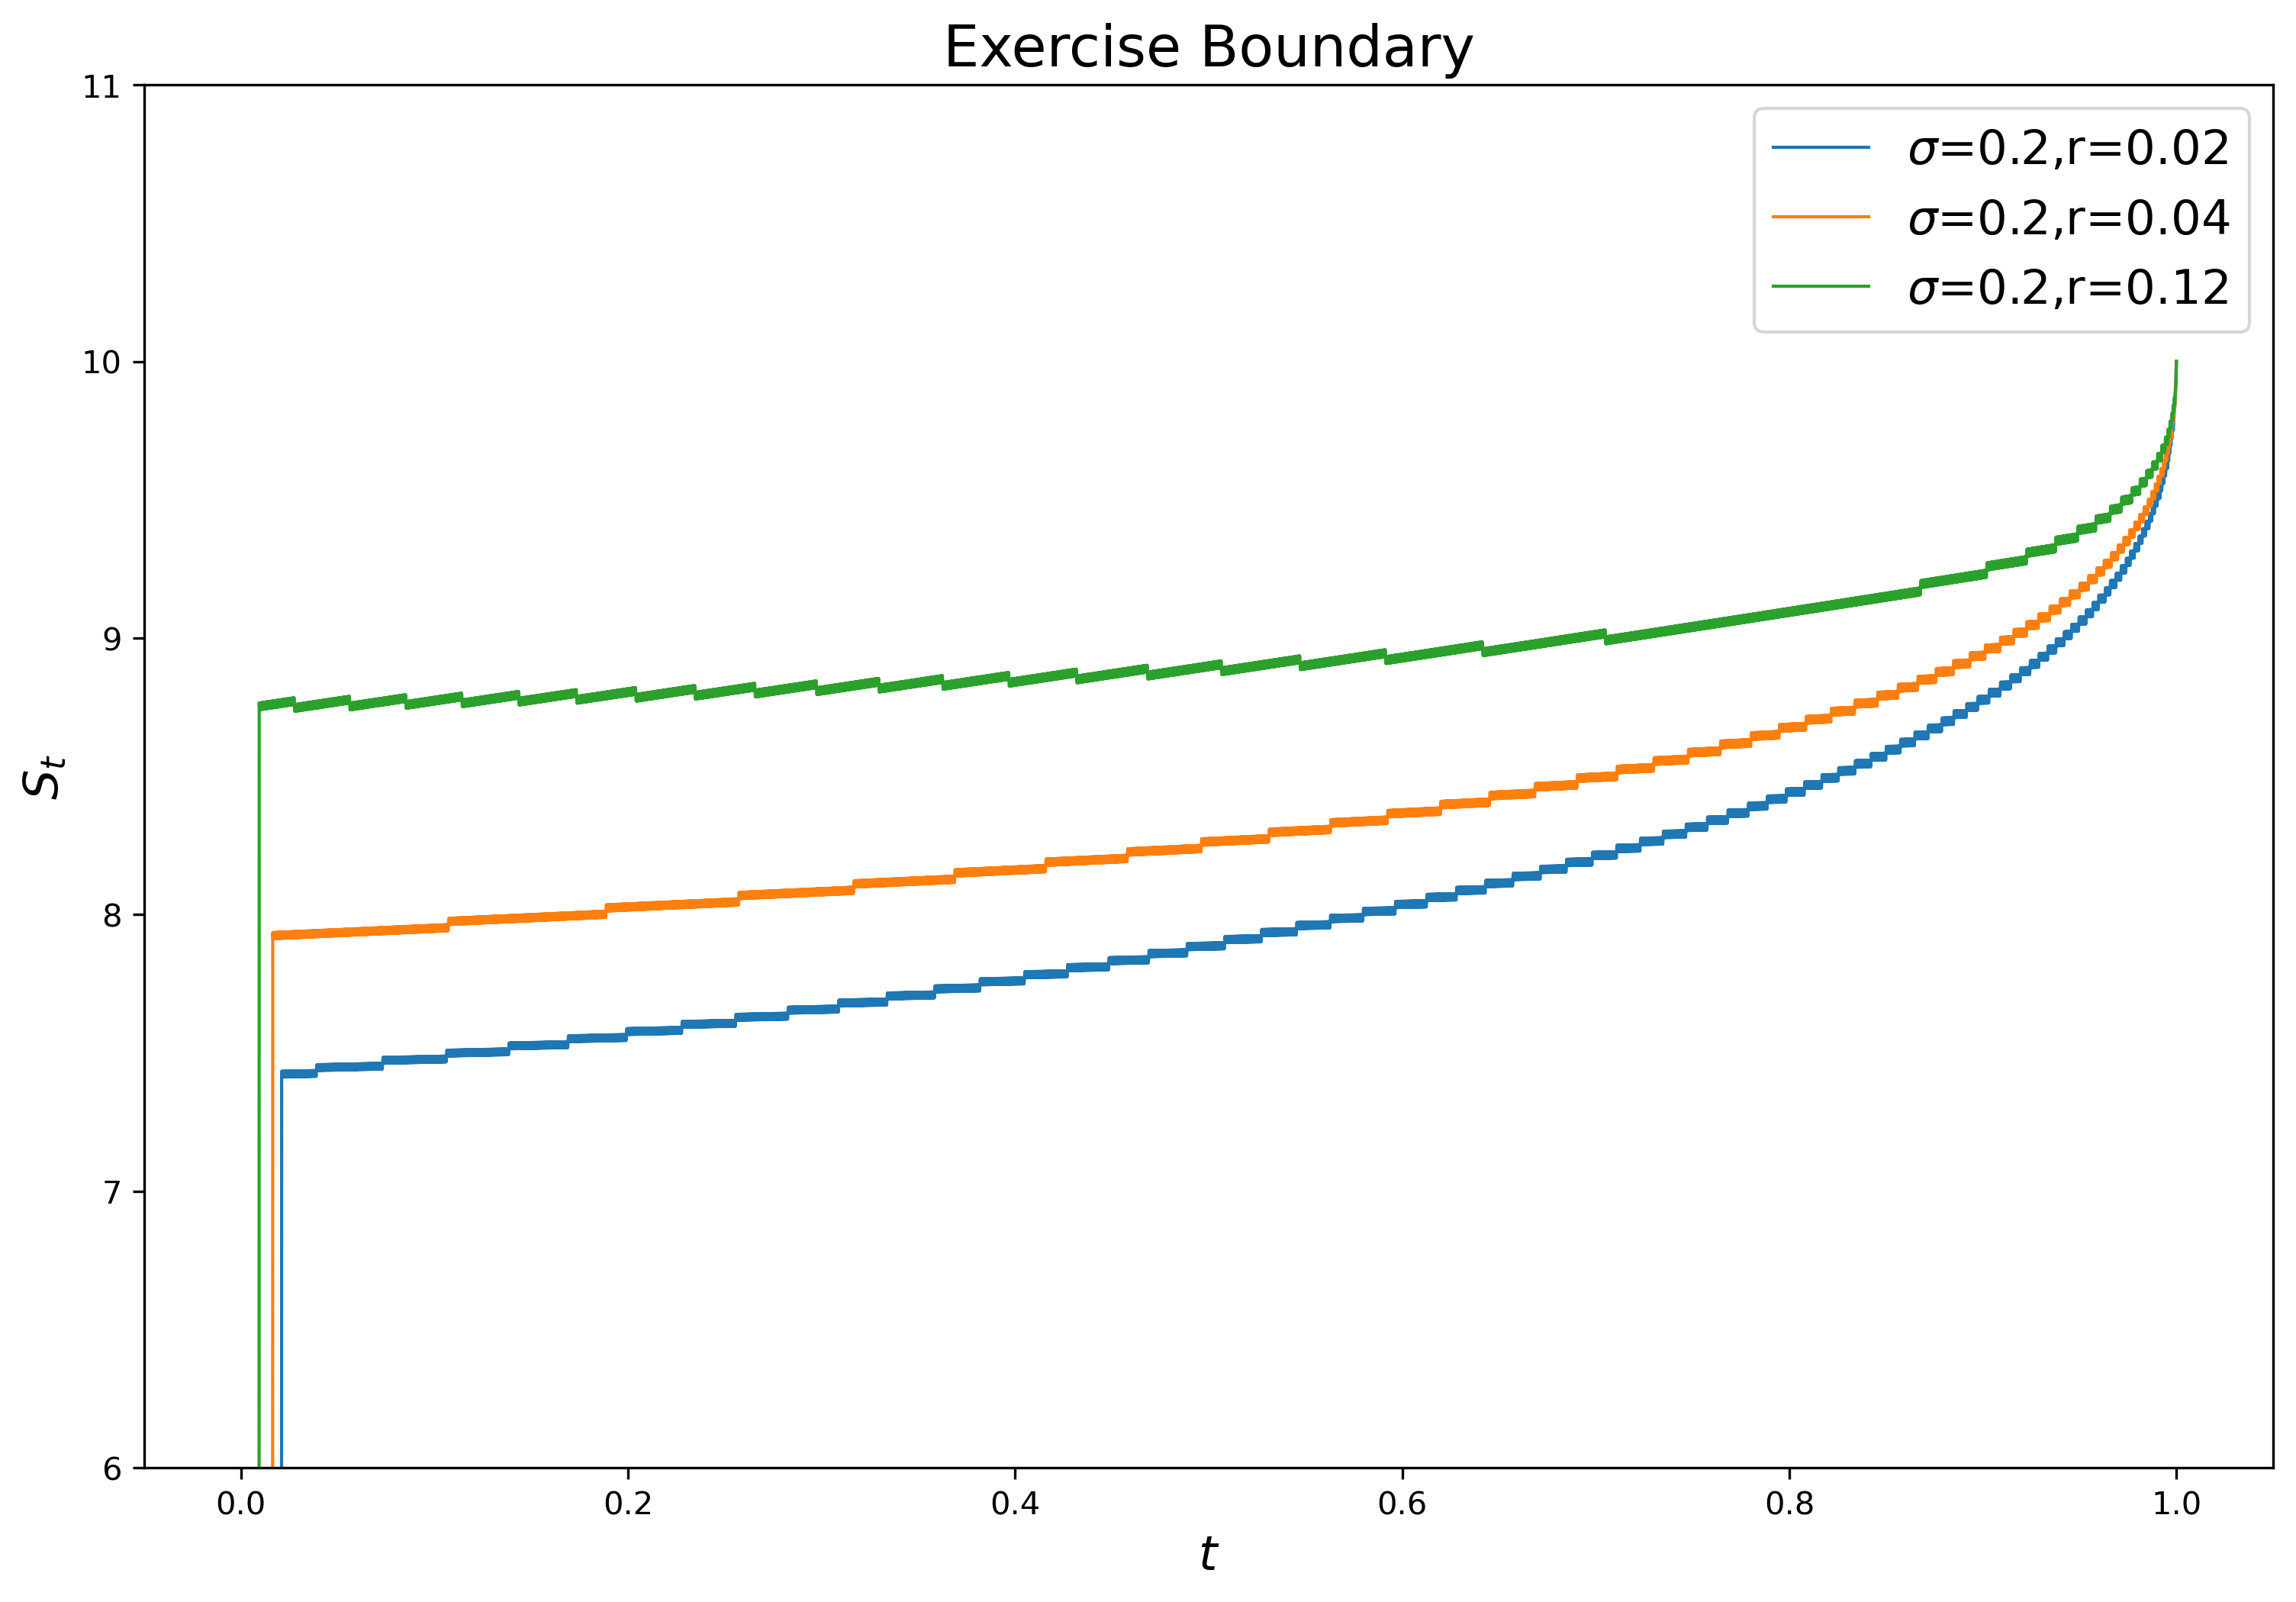

In [23]:
#Q3-a sensitivity analysis
##### boundary curve
plt.figure(figsize=(12,8),dpi=300)
plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
#plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
#plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
#plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
#plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
#plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
#plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()

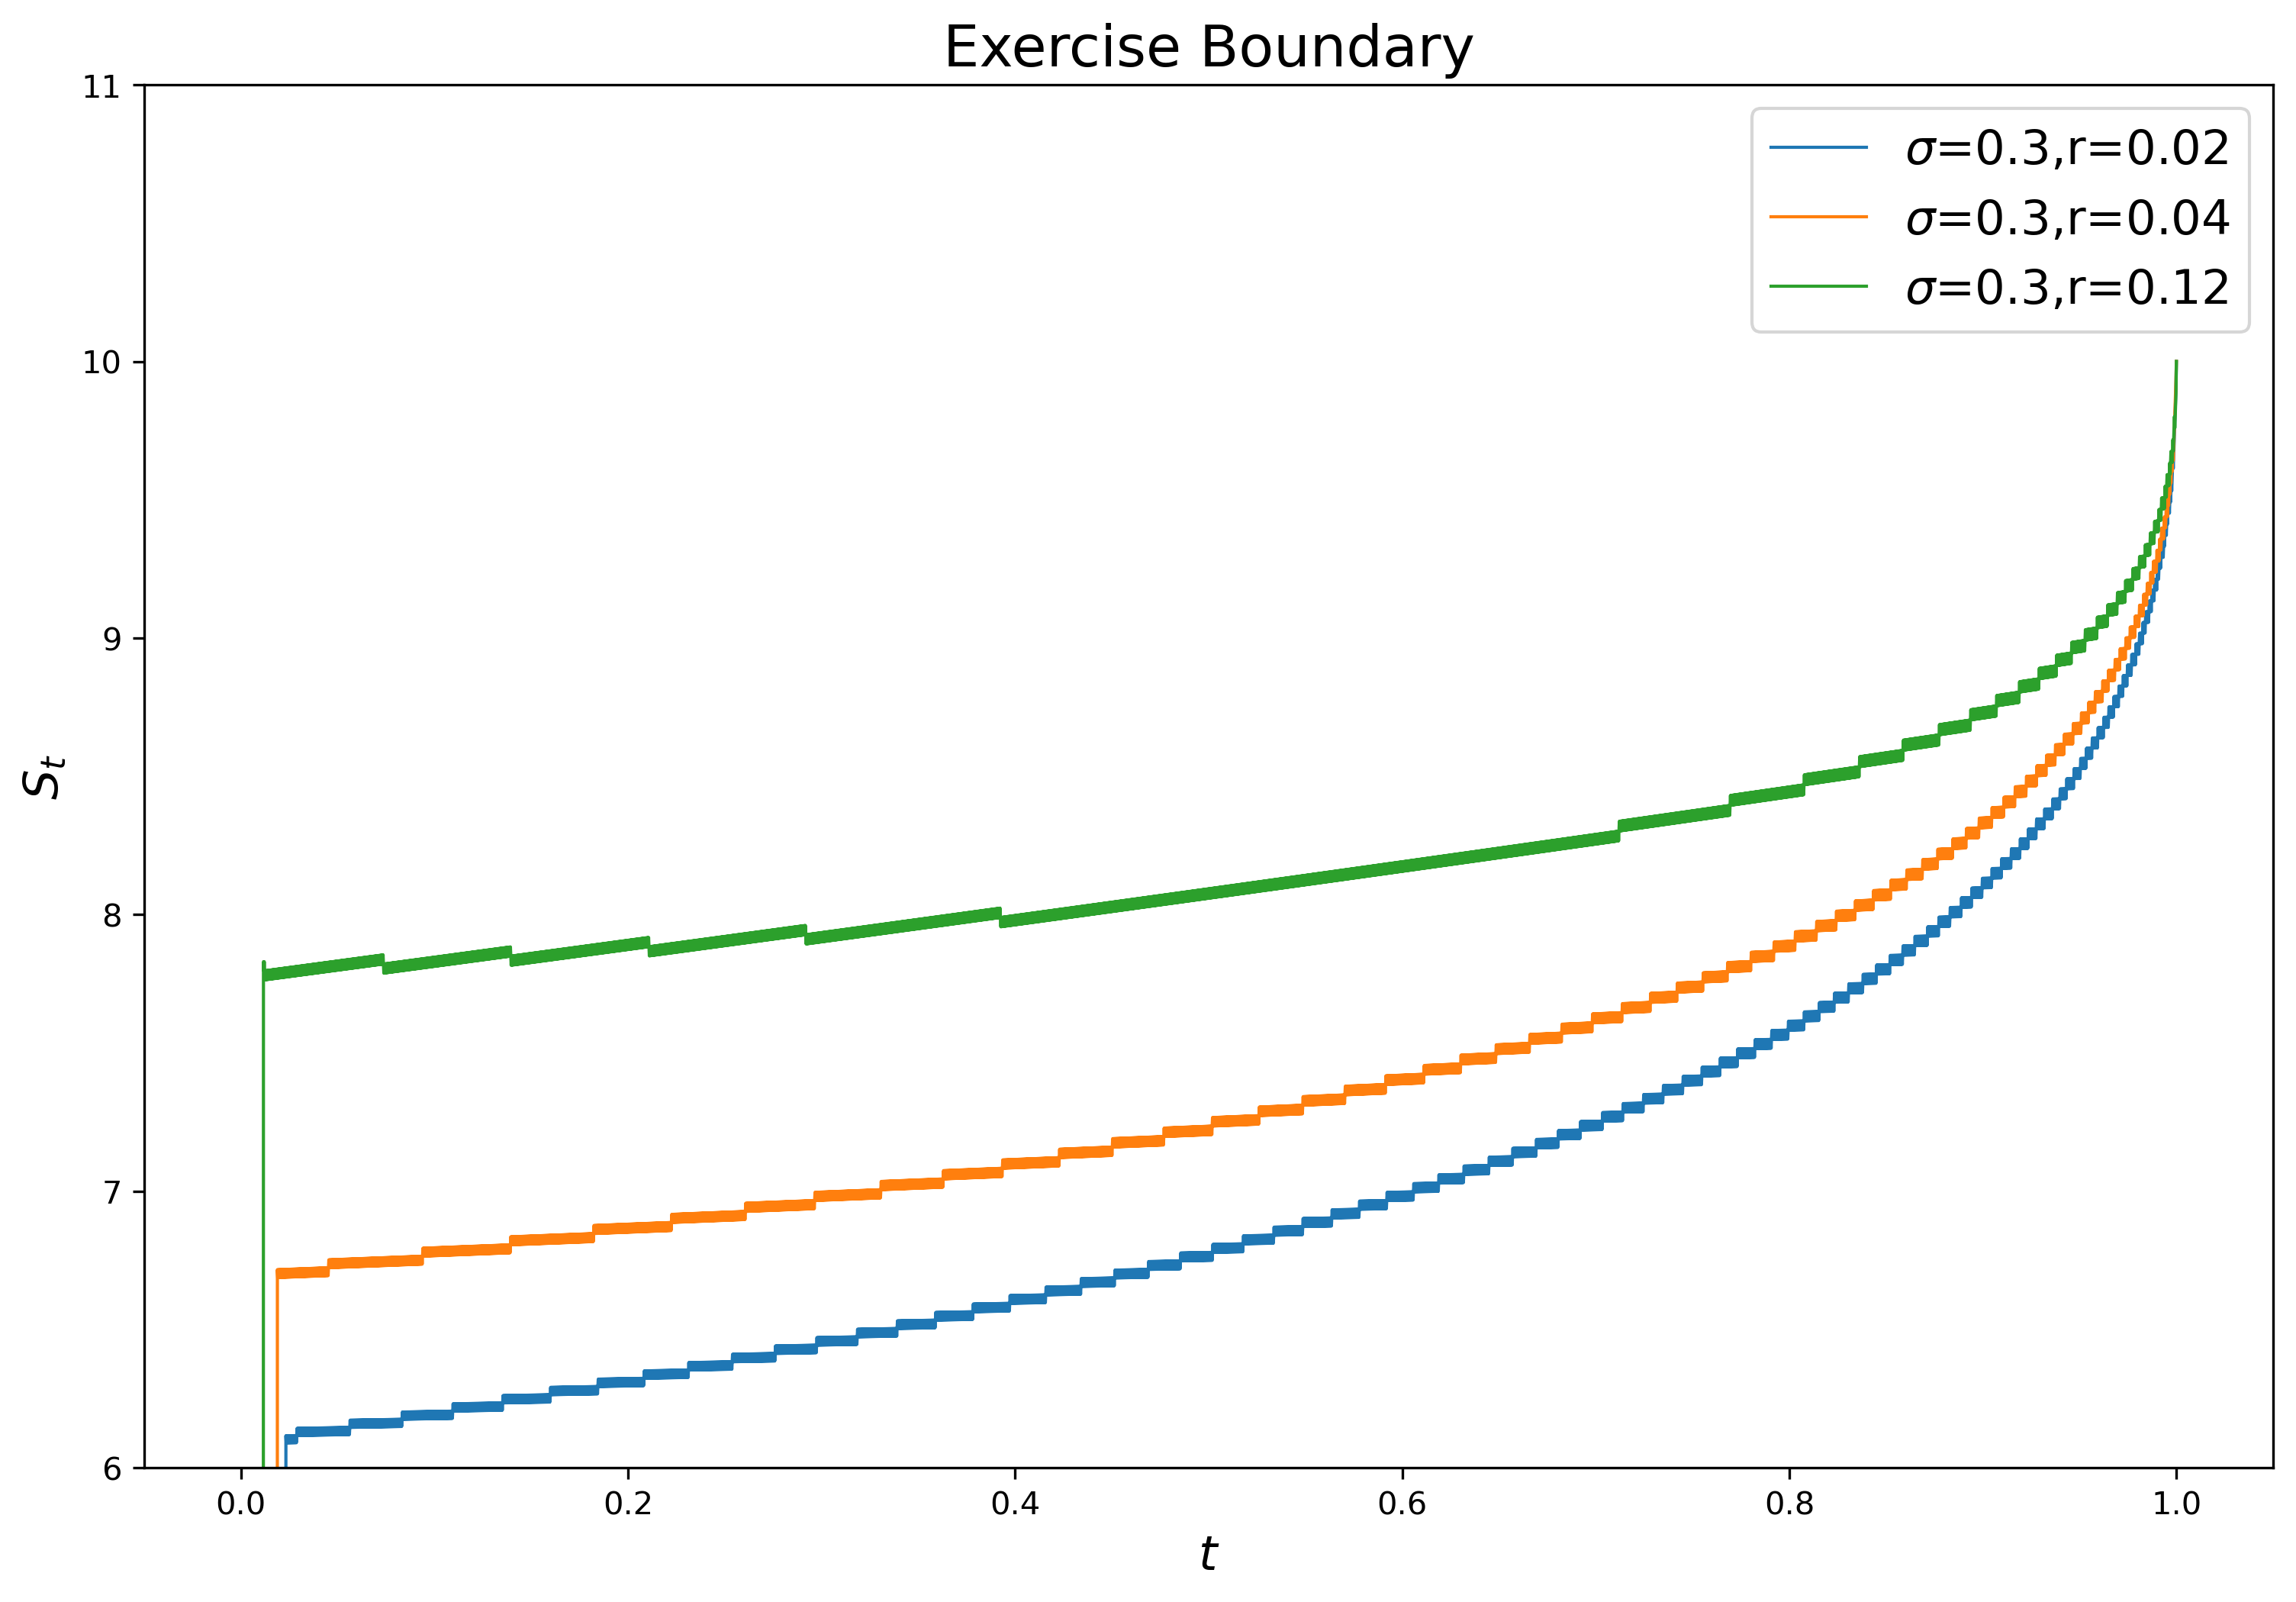

In [24]:
#Q3-a sensitivity analysis
##### boundary curve
plt.figure(figsize=(12,8),dpi=300)
#plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
#plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
#plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
#plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
#plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
#plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()

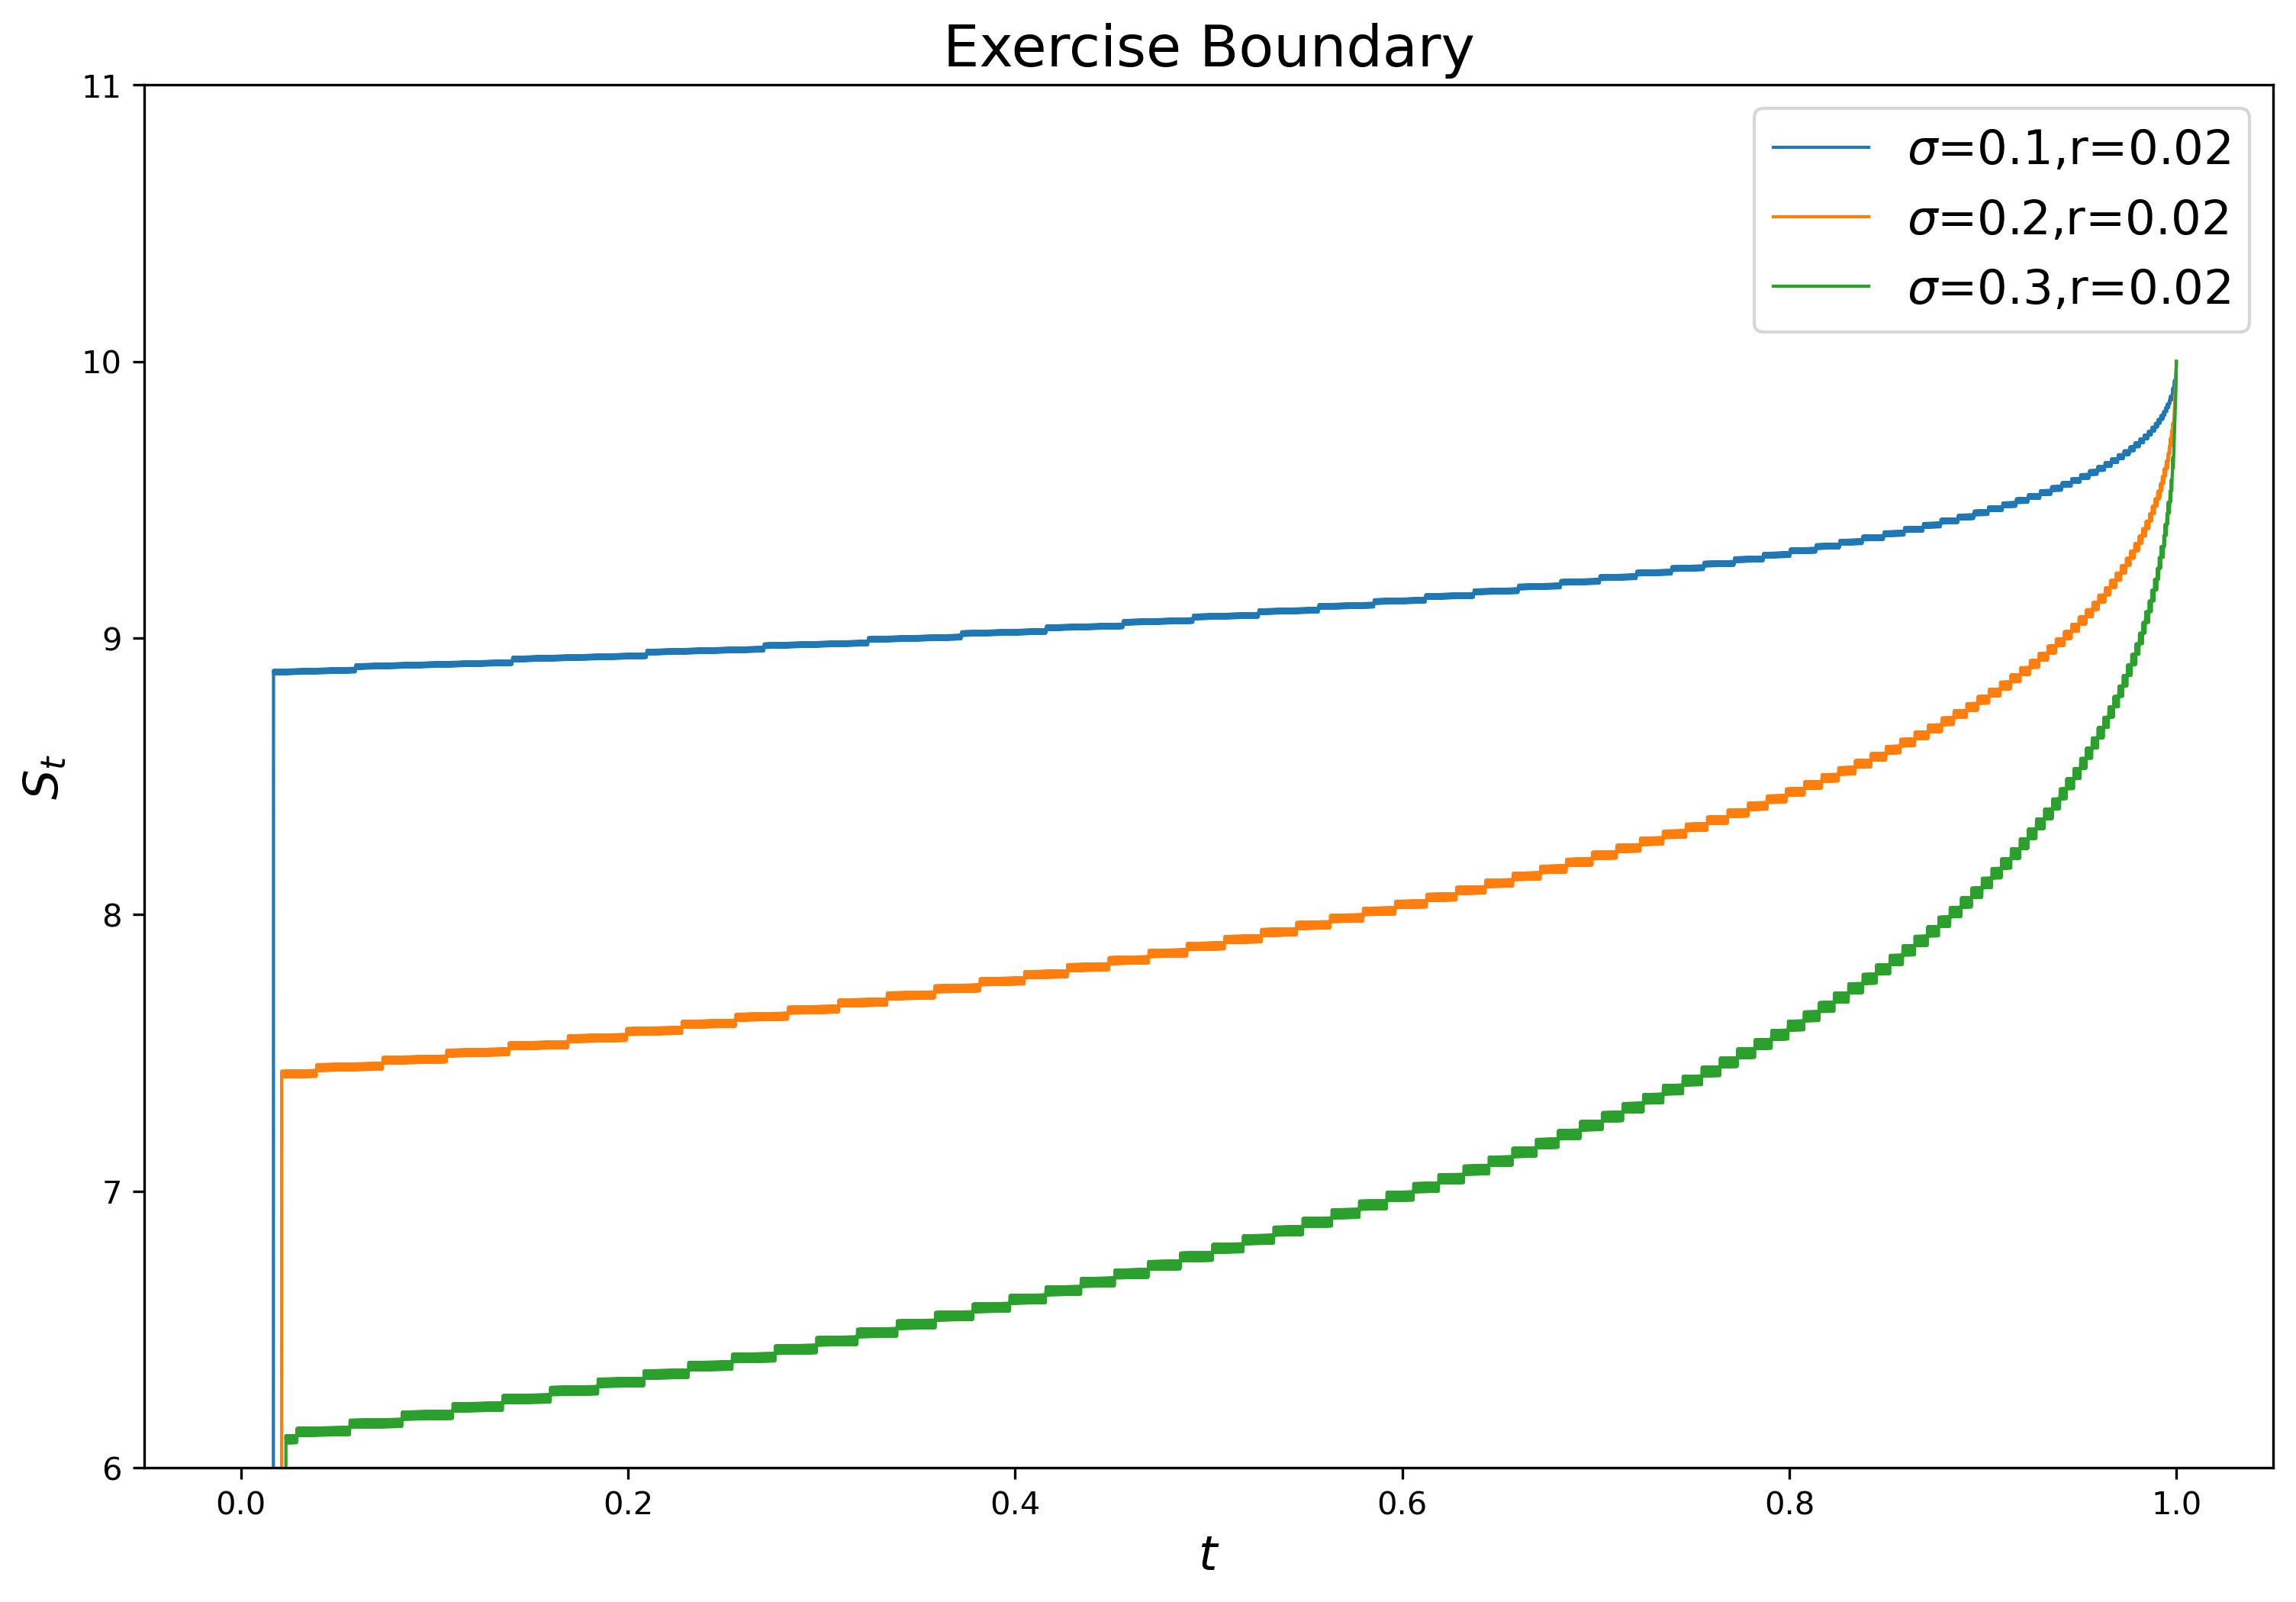

In [26]:
#Q3-a sensitivity analysis
##### boundary curve
plt.figure(figsize=(12,8),dpi=300)
plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
#plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
#plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
#plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
#plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
#plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
#plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()

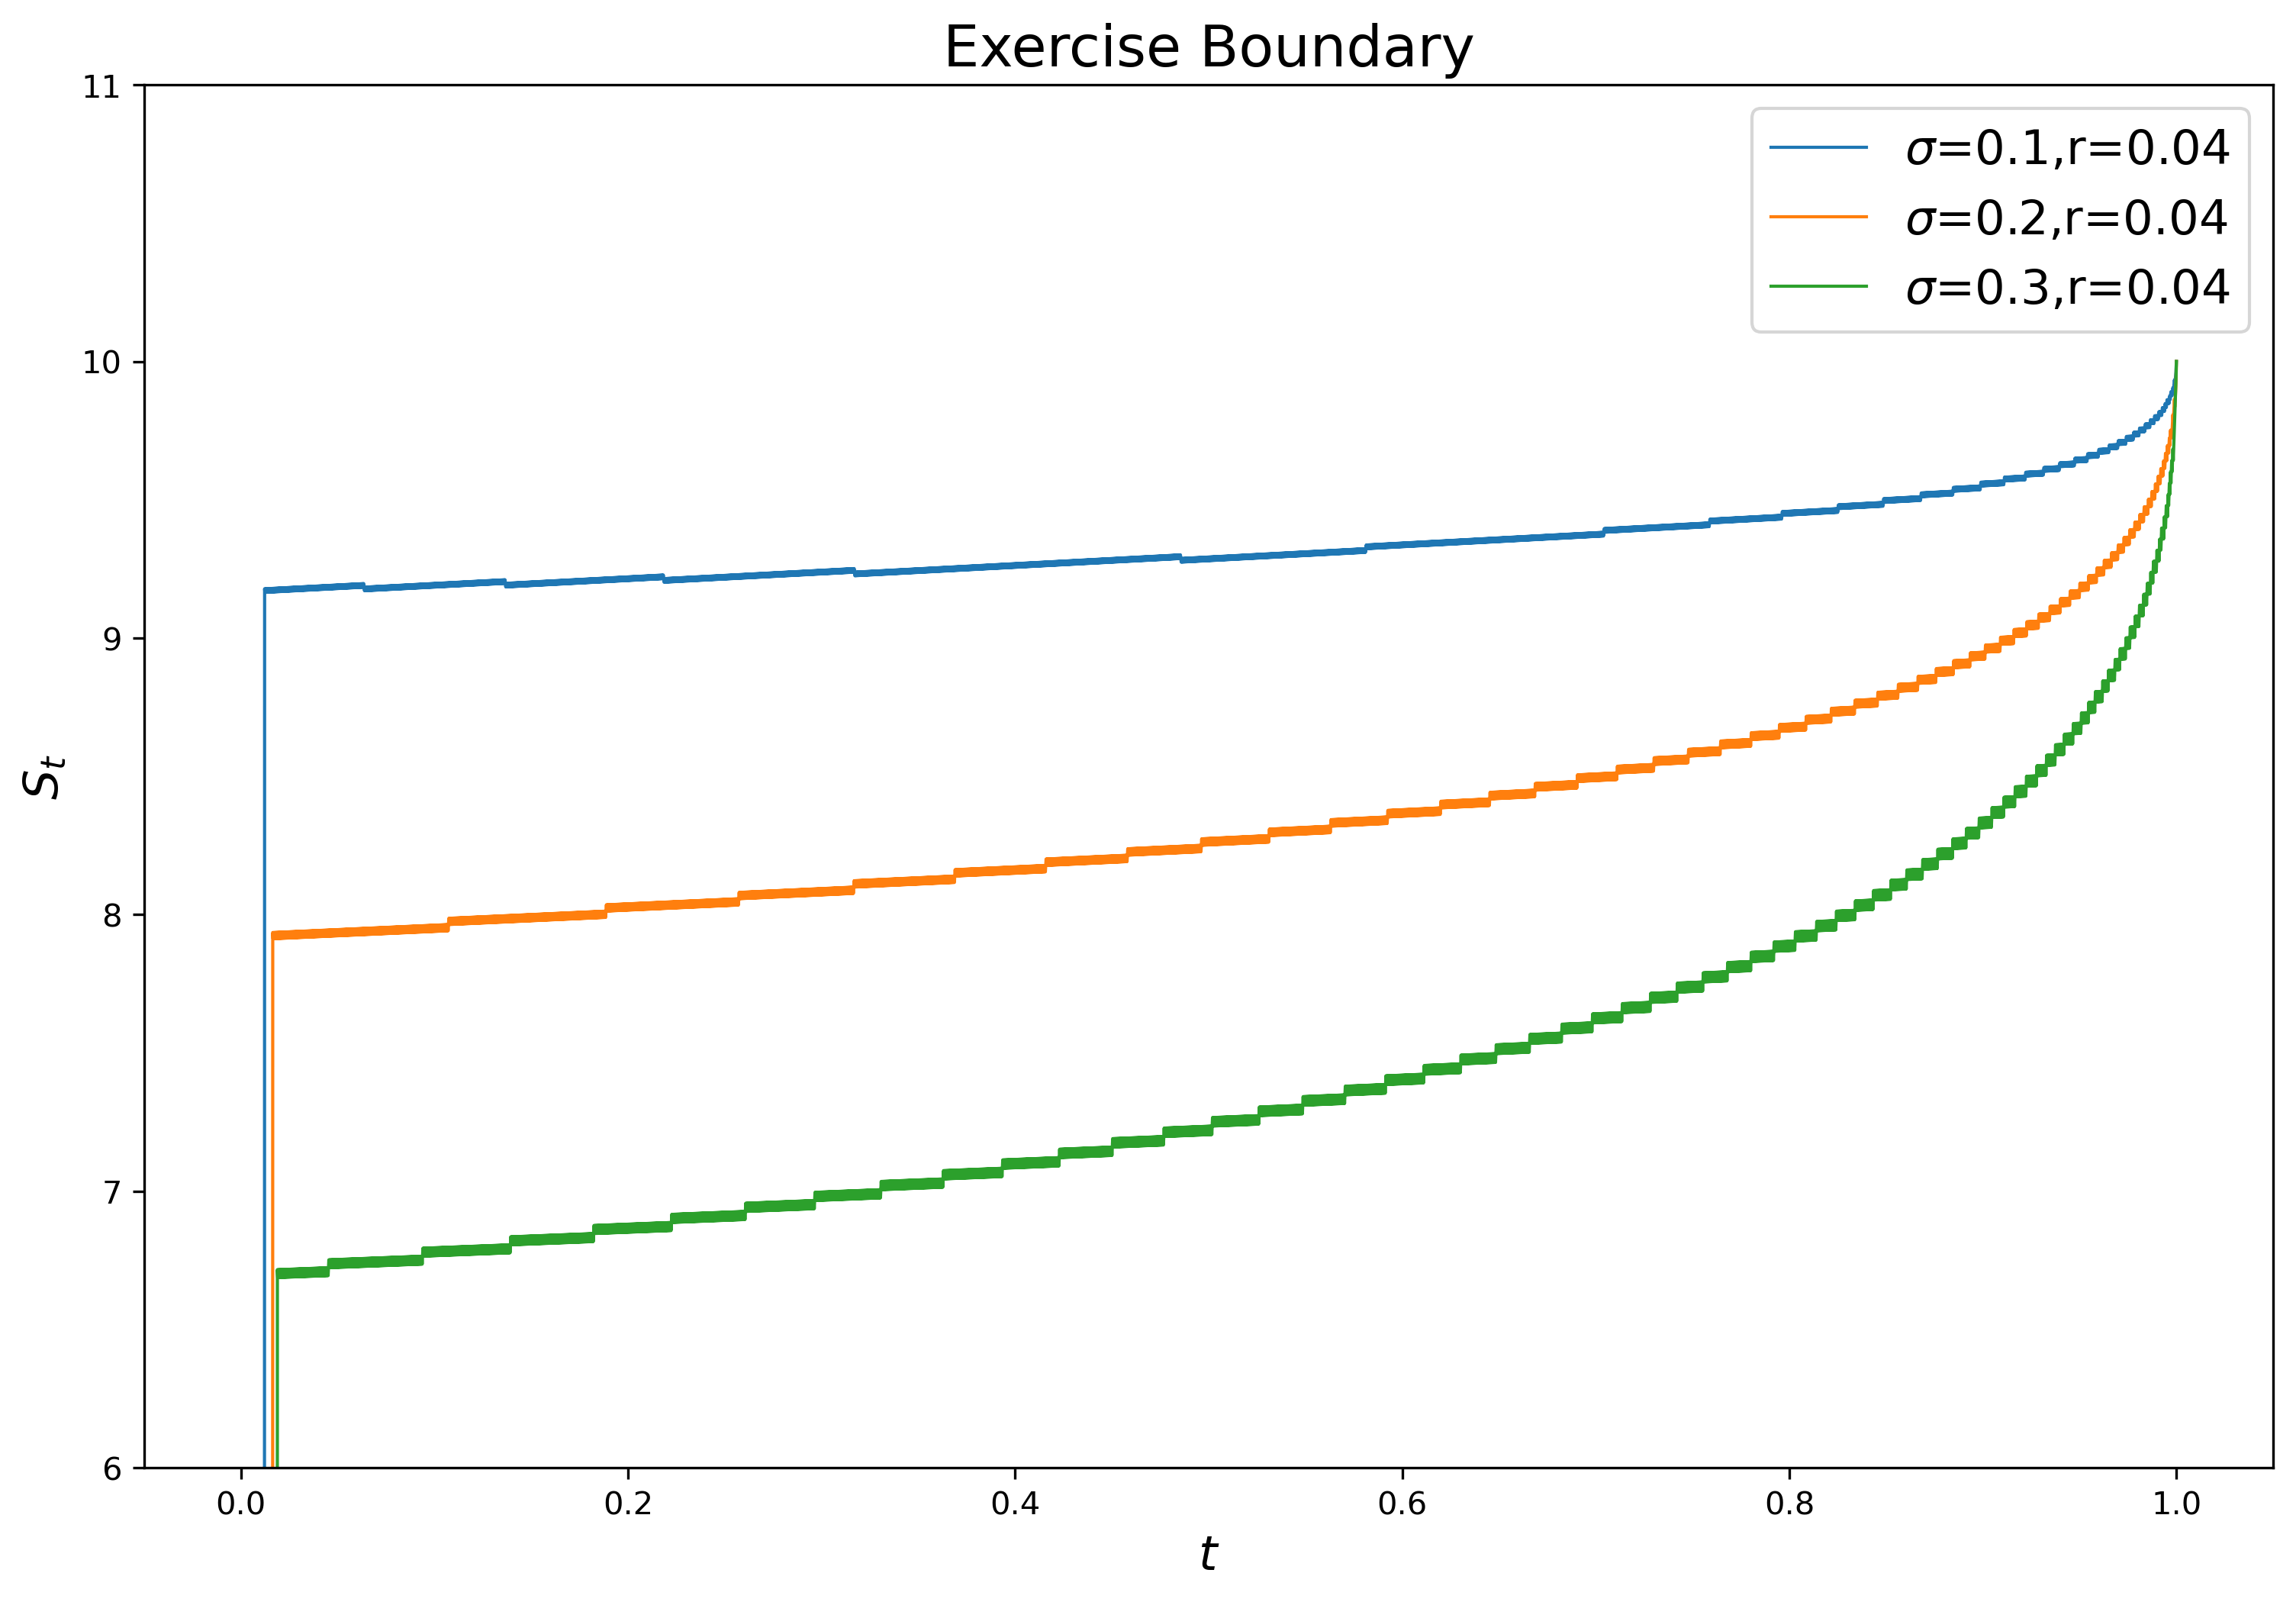

In [27]:
#Q3-a sensitivity analysis
##### boundary curve
plt.figure(figsize=(12,8),dpi=300)
#plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
#plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
#plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
#plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
#plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
#plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()

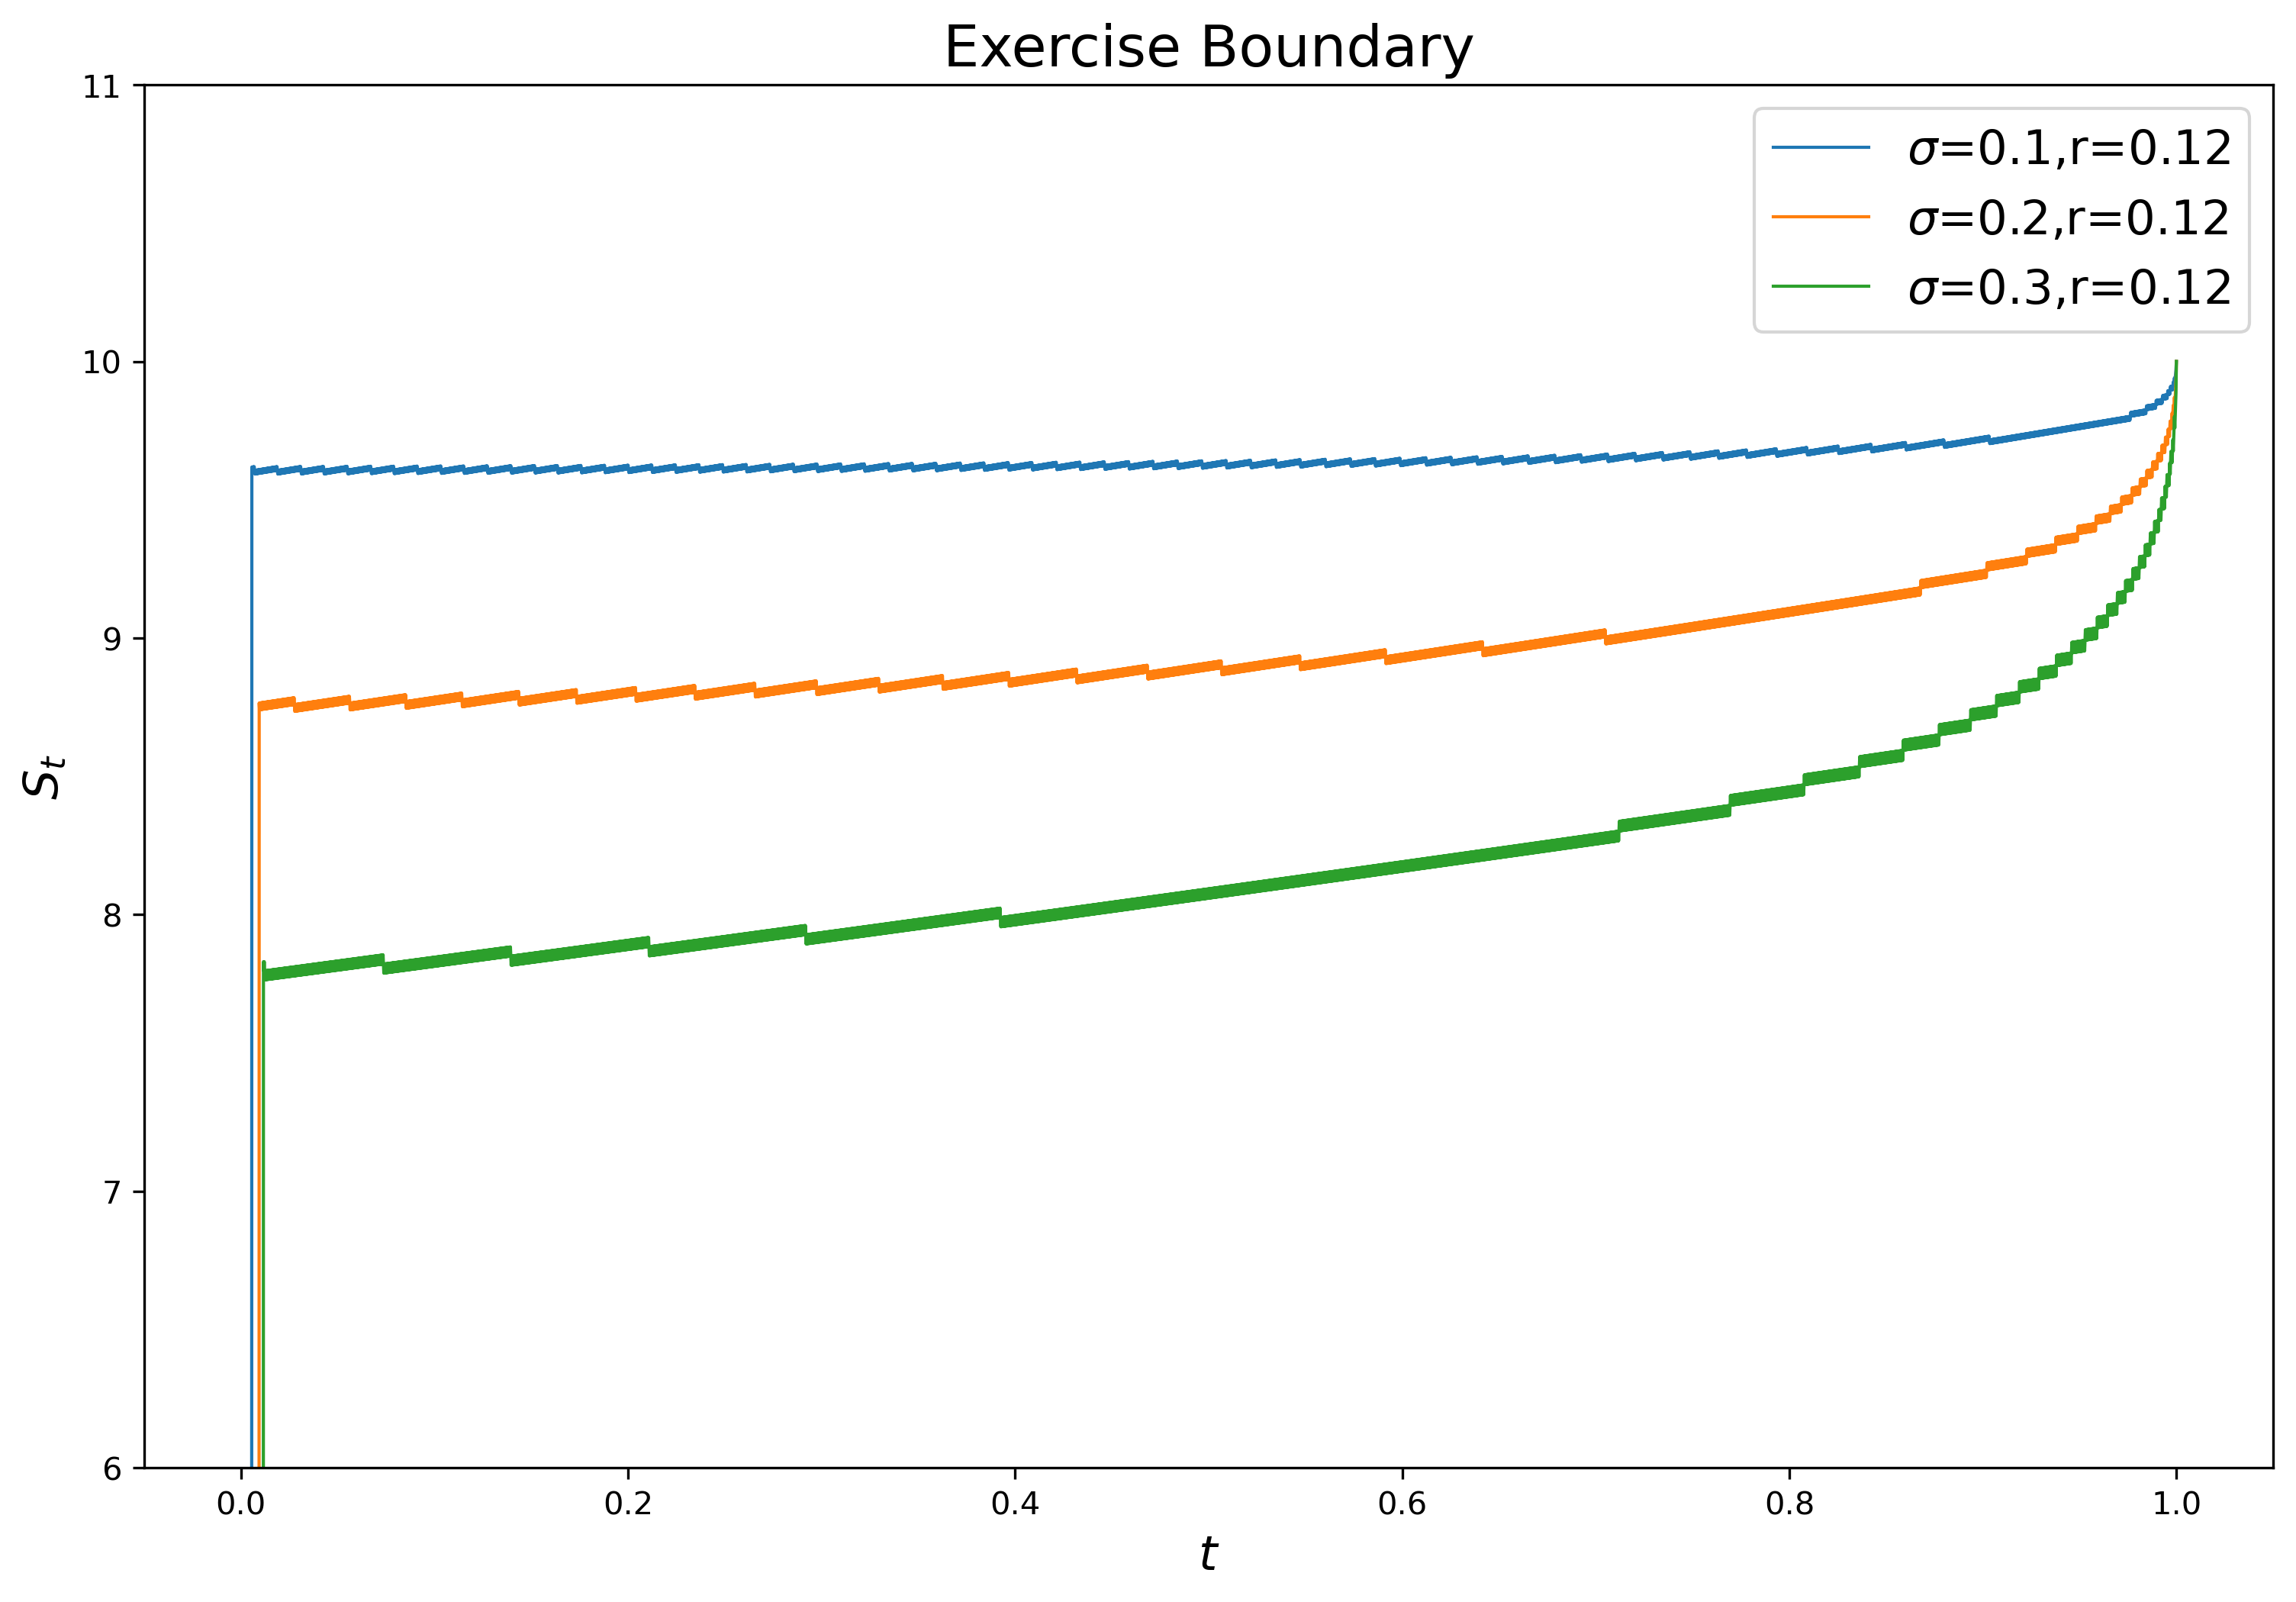

In [28]:
#Q3-a sensitivity analysis
##### boundary curve
plt.figure(figsize=(12,8),dpi=300)
#plt.plot(boundary_df2.index,boundary_df2,linewidth=1,label='$\sigma$=0.1,r=0.02')
#plt.plot(boundary_df1.index,boundary_df1,linewidth=1,label='$\sigma$=0.2,r=0.02')
#plt.plot(boundary_df4.index,boundary_df4,linewidth=1,label='$\sigma$=0.1,r=0.04')
#plt.plot(boundary_df3.index,boundary_df3,linewidth=1,label='$\sigma$=0.2,r=0.04')
plt.plot(boundary_df6.index,boundary_df6,linewidth=1,label='$\sigma$=0.1,r=0.12')
plt.plot(boundary_df5.index,boundary_df5,linewidth=1,label='$\sigma$=0.2,r=0.12')
#plt.plot(boundary_df7.index,boundary_df7,linewidth=1,label='$\sigma$=0.3,r=0.02')
#plt.plot(boundary_df8.index,boundary_df8,linewidth=1,label='$\sigma$=0.3,r=0.04')
plt.plot(boundary_df9.index,boundary_df9,linewidth=1,label='$\sigma$=0.3,r=0.12')
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$S_t$',fontsize=15)
plt.ylim([6,11])
plt.title('Exercise Boundary',fontsize=18)
plt.legend(loc=0,ncol=1,fontsize=15)
plt.show()